# [Prediction Interval Competition II: House Price](https://www.kaggle.com/competitions/prediction-interval-competition-ii-house-price/data)

In [2]:
import importlib
import house_module
importlib.reload(house_module)

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('tableau-colorblind10') # mpl.style.available
import seaborn as sns
sns.set_style("white")

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

random_state = 42
np.random.seed(random_state)

# Competition variables.
base_path = "data/" #"/kaggle/input/prediction-interval-competition-ii-house-price/"
alpha = 0.1  # the specified competition alpha (i.e., 90% coverage)

# Import Data

In [4]:
train = pd.read_csv('data/dataset.csv', index_col='id', parse_dates=['sale_date'])
test = pd.read_csv('data/test.csv', index_col='id', parse_dates=['sale_date'])
print(f"Train: {train.shape[0]} rows, {train.shape[1]} columns")
print(f"Test: {test.shape[0]} rows, {test.shape[1]} columns")

Train: 200000 rows, 46 columns
Test: 200000 rows, 45 columns


In [146]:
train.head()

,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
id,,,,,,,,,,,,,,,,,,,,,
0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,FEDERAL WAY,...,0,0,0,0,0,0,0,0,0,I
1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,KIRKLAND,...,0,0,0,0,0,1,0,0,0,Q
2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,RENTON,...,0,0,0,0,0,0,0,0,0,K
3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,BURIEN,...,0,0,0,0,0,0,0,0,0,G
4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,KING COUNTY,...,0,0,0,0,0,0,0,0,0,P


In [147]:
test.head()

,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,zoning,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
id,,,,,,,,,,,,,,,,,,,,,
200000,2022-12-15,4.0,,new,2025,47.4794,-122.2212,25,RENTON,R-8,...,0,0,0,0,0,0,0,0,0,J
200001,2000-10-15,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,R1,...,0,0,0,0,0,0,0,0,0,O
200002,2004-06-15,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,R-3.5,...,3,0,3,3,0,2,0,0,0,R
200003,2009-11-15,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,LR1 (M1),...,0,0,0,0,0,0,0,0,0,B
200004,1999-06-15,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,RA2.5P,...,0,2,4,0,3,0,0,0,0,H


In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_date         200000 non-null  datetime64[ns]
 1   sale_price        200000 non-null  int64         
 2   sale_nbr          157818 non-null  float64       
 3   sale_warning      200000 non-null  object        
 4   join_status       200000 non-null  object        
 5   join_year         200000 non-null  int64         
 6   latitude          200000 non-null  float64       
 7   longitude         200000 non-null  float64       
 8   area              200000 non-null  int64         
 9   city              200000 non-null  object        
 10  zoning            200000 non-null  object        
 11  subdivision       182450 non-null  object        
 12  present_use       200000 non-null  int64         
 13  land_val          200000 non-null  int64         
 14  imp_val  

In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 200000 to 399999
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_date         200000 non-null  datetime64[ns]
 1   sale_nbr          157588 non-null  float64       
 2   sale_warning      200000 non-null  object        
 3   join_status       200000 non-null  object        
 4   join_year         200000 non-null  int64         
 5   latitude          200000 non-null  float64       
 6   longitude         200000 non-null  float64       
 7   area              200000 non-null  int64         
 8   city              200000 non-null  object        
 9   zoning            200000 non-null  object        
 10  subdivision       182450 non-null  object        
 11  present_use       200000 non-null  int64         
 12  land_val          200000 non-null  int64         
 13  imp_val           200000 non-null  int64         
 14  year

## Missing Values

### `sale_nbr`

In [150]:
train['sale_nbr'] = train['sale_nbr'].fillna(train['sale_nbr'].median())
test['sale_nbr'] = test['sale_nbr'].fillna(test['sale_nbr'].median())

### `subdivision`

In [151]:
def fill_subdivision(df):
    nan_idx = df.loc[df['subdivision'].isna()].index
    for idx in nan_idx:
        zoning = df.loc[idx, 'zoning']
        if pd.notna(zoning):
            try:
                df.loc[idx, 'subdivision'] = df.loc[df['zoning'] == zoning, 'subdivision'].mode()[0]
            except KeyError:
                df.loc[idx, 'subdivision'] = 'Unknown'
        else:
            df.loc[idx, 'subdivision'] = 'Unknown'
    return df

train = fill_subdivision(train)
test = fill_subdivision(test)

### `submarket`

In [152]:
def fill_submarket(df):
    nan_idx = df.loc[df['submarket'].isna()].index
    for idx in nan_idx:
        zoning = df.loc[idx, 'zoning']
        if pd.notna(zoning):
            try:
                df.loc[idx, 'submarket'] = df.loc[df['zoning'] == zoning, 'submarket'].mode()[0]
            except KeyError:
                df.loc[idx, 'submarket'] = 'Unknown'
        else:
            df.loc[idx, 'submarket'] = 'Unknown'
    return df

train = fill_submarket(train)
test = fill_submarket(test)

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_date         200000 non-null  datetime64[ns]
 1   sale_price        200000 non-null  int64         
 2   sale_nbr          200000 non-null  float64       
 3   sale_warning      200000 non-null  object        
 4   join_status       200000 non-null  object        
 5   join_year         200000 non-null  int64         
 6   latitude          200000 non-null  float64       
 7   longitude         200000 non-null  float64       
 8   area              200000 non-null  int64         
 9   city              200000 non-null  object        
 10  zoning            200000 non-null  object        
 11  subdivision       200000 non-null  object        
 12  present_use       200000 non-null  int64         
 13  land_val          200000 non-null  int64         
 14  imp_val  

In [4]:
train.to_csv('data/train_filled.csv', index=True, index_label='id')
test.to_csv('data/test_filled.csv', index=True, index_label='id')

NameError: name 'train' is not defined

# Winkler Score Function

In [54]:
def winkler_score(y_true, lower, upper, alpha=0.1, return_coverage=False):
    """Compute the Winkler Interval Score for prediction intervals.

    Args:
        y_true (array-like): True observed values.
        lower (array-like): Lower bounds of prediction intervals.
        upper (array-like): Upper bounds of prediction intervals.
        alpha (float): Significance level (e.g., 0.1 for 90% intervals).
        return_coverage (bool): If True, also return empirical coverage.

    Returns:
        score (float): Mean Winkler Score.
        coverage (float, optional): Proportion of true values within intervals.
    """
    y_true = np.asarray(y_true)
    lower = np.asarray(lower)
    upper = np.asarray(upper)

    width = upper - lower
    penalty_lower = 2 / alpha * (lower - y_true)
    penalty_upper = 2 / alpha * (y_true - upper)

    score = width.copy()
    score += np.where(y_true < lower, penalty_lower, 0)
    score += np.where(y_true > upper, penalty_upper, 0)

    if return_coverage:
        inside = (y_true >= lower) & (y_true <= upper)
        coverage = np.mean(inside)
        return np.mean(score), coverage

    return np.mean(score)

# Exploratory Data Analysis

In [55]:
train = pd.read_csv('data/train_filled.csv', parse_dates=['sale_date'], index_col='id')
test = pd.read_csv('data/test_filled.csv', parse_dates=['sale_date'], index_col='id')

## Target - `sale_price`

<Axes: >

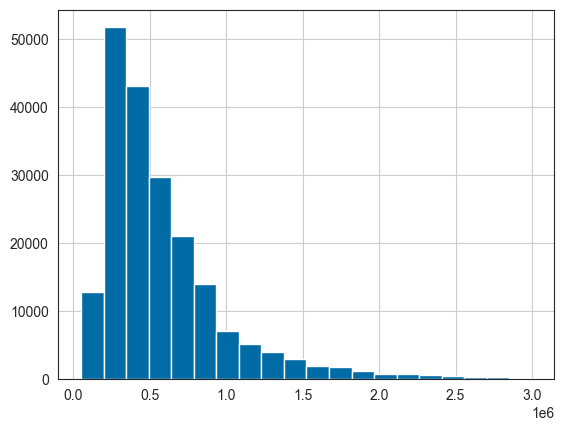

In [56]:
train['sale_price'].hist(bins=20)

<Axes: >

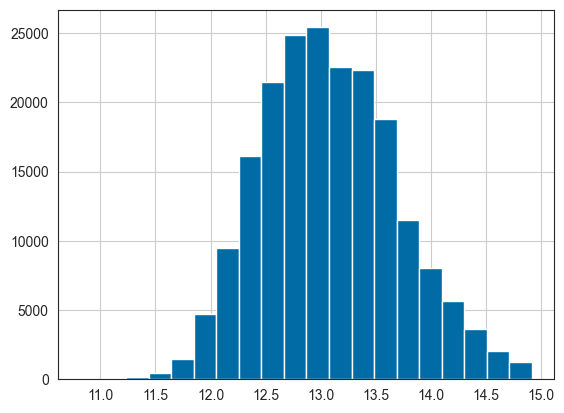

In [57]:
np.log1p(train['sale_price']).hist(bins=20)

In [58]:
train['sale_price_log'] = np.log1p(train['sale_price'])
train[['sale_price', 'sale_price_log']] = train[['sale_price', 'sale_price_log']].astype(np.float64)

test['sale_price'] = np.array([0]*test.shape[0], dtype=np.float64)
test['sale_price_log'] = np.array([0]*test.shape[0], dtype=np.float64)

## Split Data for Data Exploratory Analysis

In [ ]:
train, val = house_module.stratified_split(train, 'sale_price', .25)

## `sale_date`

In [60]:
train[['sale_date', 'sale_price']].corr()

,sale_date,sale_price
sale_date,1.000000,0.533647
sale_price,0.533647,1.000000


In [61]:
train['year'] = train['sale_date'].dt.year
train['month'] = train['sale_date'].dt.month
val['year'] = val['sale_date'].dt.year
val['month'] = val['sale_date'].dt.month
test['year'] = test['sale_date'].dt.year
test['month'] = test['sale_date'].dt.month

## `sale_warning`

In [62]:
train['sale_warning'] = train['sale_warning'].str.strip()
train['sale_warning'] = train['sale_warning'].str.split(' ')

val['sale_warning'] = val['sale_warning'].str.strip()
val['sale_warning'] = val['sale_warning'].str.split(' ')

test['sale_warning'] = test['sale_warning'].str.strip()
test['sale_warning'] = test['sale_warning'].str.split(' ')

In [63]:
train['sale_warning'] = train['sale_warning'].apply(lambda x: np.nan if x[0] == '' else x)
train['sale_warning_len'] = train['sale_warning'].str.len()
train['sale_warning_len'] = train['sale_warning_len'].fillna(0).astype(np.int64)
train['sale_warning'] = train['sale_warning'].apply(lambda x: x if isinstance(x, list) else [0])

val['sale_warning'] = val['sale_warning'].apply(lambda x: np.nan if x[0] == '' else x)
val['sale_warning_len'] = val['sale_warning'].str.len()
val['sale_warning_len'] = val['sale_warning_len'].fillna(0).astype(np.int64)
val['sale_warning'] = val['sale_warning'].apply(lambda x: x if isinstance(x, list) else [0])

test['sale_warning'] = test['sale_warning'].apply(lambda x: np.nan if x[0] == '' else x)
test['sale_warning_len'] = test['sale_warning'].str.len()
test['sale_warning_len'] = test['sale_warning_len'].fillna(0).astype(np.int64)
test['sale_warning'] = test['sale_warning'].apply(lambda x: x if isinstance(x, list) else [0])

In [ ]:
train['sale_warning_len'] = train['sale_warning_len'].astype(np.int64)
val['sale_warning_len'] = val['sale_warning_len'].astype(np.int64)
test['sale_warning_len'] = test['sale_warning_len'].astype(np.int64)

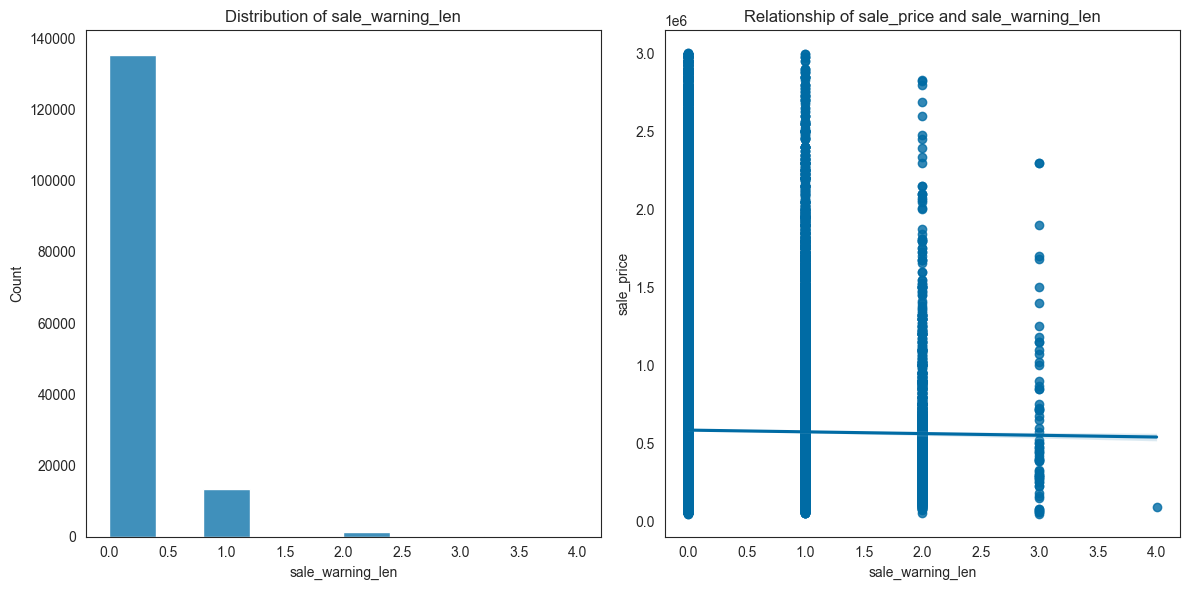

In [65]:
house_module.visualise_data(train, 'sale_warning_len', 'sale_price')

## Year

In [66]:
train['year_built_sale'] = train['year'] - train['year_built']
val['year_built_sale'] = val['year'] - val['year_built']
test['year_built_sale'] = test['year'] - test['year_built']

def year_reno_sale(row):
    if row['year_reno'] > 0:
        return row['year'] - row['year_reno']
    else:
        return row['year_built_sale']

train['year_reno_sale'] = train.apply(year_reno_sale, axis=1)
val['year_reno_sale'] = val.apply(year_reno_sale, axis=1)
test['year_reno_sale'] = test.apply(year_reno_sale, axis=1)

# Data Preparation and Model Fitting

In [ ]:
# Split features and target.
train, val = house_module.stratified_split(train, "sale_price", val_size=.2)

X_train, X_val = train.drop(['sale_warning', "sale_price", "sale_price_log"], axis=1), val.drop(["sale_warning", "sale_price", "sale_price_log"], axis=1)
y_train, y_val = train["sale_price"], val["sale_price"]

X_test = test.drop(["sale_warning", "sale_price", "sale_price_log"], axis=1)
y_test = test["sale_price"]

# Ordinal encoding.
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

# Imputation.
num_cols = X_train.select_dtypes(include="number").columns.tolist()

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

def impute(df, cols, imputer, fit=False):
    """Helper function for imputation."""
    if fit:
        return pd.DataFrame(imputer.fit_transform(df[cols]), columns=cols, index=df.index)
    else:
        return pd.DataFrame(imputer.transform(df[cols]), columns=cols, index=df.index)


X_train[num_cols] = impute(X_train, num_cols, num_imputer, fit=True)
X_val[num_cols] = impute(X_val, num_cols, num_imputer)
X_test[num_cols] = impute(X_test, num_cols, num_imputer)

X_train[cat_cols] = impute(X_train, cat_cols, cat_imputer, fit=True)
X_val[cat_cols] = impute(X_val, cat_cols, cat_imputer)
X_test[cat_cols] = impute(X_test, cat_cols, cat_imputer)

class SaleDateEncoder(BaseEstimator, TransformerMixin):
    """Encode sale date as a week of the year feature."""

    def __init__(self, date_column="sale_date"):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.assign(
            **{
                "sale_week": lambda x: x["sale_date"].dt.isocalendar().week,
            }
        ).drop(columns=["sale_date"])
        return X

    def fit_transform(self, X):
        return self.fit(self, X).transform(X)

# Sale date encoding.
saledate_encoder = SaleDateEncoder(date_column="sale_date")
X_train = saledate_encoder.fit_transform(X_train)
X_val = saledate_encoder.transform(X_val)
X_test = saledate_encoder.transform(X_test)

# HISTGBR
hgbr_l = HistGradientBoostingRegressor(
    max_iter=1000,
    max_depth=5,
    max_leaf_nodes=31,
    min_samples_leaf=1,
    l2_regularization=0.1,
    learning_rate=0.1,
    random_state=random_state,
    loss="quantile",
    quantile=alpha/2
)
hgbr_l.fit(X_train, y_train)

hgbr_u = HistGradientBoostingRegressor(
    max_iter=1000,
    max_depth=5,
    max_leaf_nodes=31,
    min_samples_leaf=1,
    l2_regularization=0.1,
    learning_rate=0.1,
    random_state=random_state,
    loss="quantile",
    quantile=1 - alpha/2
)
hgbr_u.fit(X_train, y_train)

y_val_pred_l = hgbr_l.predict(X_val)
y_val_pred_u = hgbr_u.predict(X_val)

# y_val_pred_l_original = np.expm1(y_val_pred_l)
# y_val_pred_u_original = np.expm1(y_val_pred_u)
# y_val_original = np.expm1(y_val)

y_val_pred = pd.DataFrame({
    "pi_lower": y_val_pred_l,
    "pi_upper": y_val_pred_u
})

mws, coverage = winkler_score(
    y_val,
    y_val_pred["pi_lower"],
    y_val_pred["pi_upper"],
    alpha=alpha,
    return_coverage=True,
)

print("Mean Winkler Score:", round(mws, 2))
print("Coverage:", round(coverage * 100, 1), "%")

y_val_pred.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

nonconf_score = np.maximum(y_val_pred['pi_lower'] - y_val, y_val - y_val_pred['pi_upper'])

q = nonconf_score.quantile(1 - alpha)
print(q)

test_preds_l = hgbr_l.predict(X_test) - q
test_preds_u = hgbr_u.predict(X_test) + q
test_preds = pd.DataFrame({
    "pi_lower": test_preds_l,
    "pi_upper": test_preds_u
})

sample_submission = pd.read_csv(base_path + "sample_submission.csv")
sample_submission['pi_lower'] = test_preds["pi_lower"]
sample_submission['pi_upper'] = test_preds["pi_upper"]

sample_submission.to_csv("submission_imputed.csv", index=False)

sample_submission

Mean Winkler Score: 352268.62
Coverage: 88.8 %
1578.3957966147377


,id,pi_lower,pi_upper
0,200000,813036.880702,1.131885e+06
1,200001,582273.933708,8.854170e+05
2,200002,469570.311370,7.375684e+05
3,200003,312476.141502,4.528396e+05
4,200004,325522.501854,7.134340e+05
...,...,...,...
199995,399995,225740.872011,4.157768e+05
199996,399996,269977.639104,3.633727e+05
199997,399997,394998.163124,5.400898e+05
199998,399998,459995.513751,5.762134e+05
